In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense , Input, GlobalMaxPool1D, LSTM,Embedding
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model

In [47]:
train = pd.read_csv("/Users/akashzamnani/datasets/NLP/poems-nlp/Poem_classification - train_data.csv")
test = pd.read_csv("/Users/akashzamnani/datasets/NLP/poems-nlp/Poem_classification - test_data.csv")

In [48]:
train.shape

(841, 2)

In [49]:
test.shape

(150, 2)

In [50]:
train.head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [51]:
train.isnull().sum()
train = train.dropna()

In [52]:
train.shape

(837, 2)

In [53]:
test.isnull().sum()

Genre    0
Poem     0
dtype: int64

In [54]:
test.head()

,Genre,Poem
0,Music,A woman walks by the bench I’m sitting onwith ...
1,Music,"Because I am a boy, the untouchability of beau..."
2,Music,"Because today we did not leave this world,We n..."
3,Music,"Big Bend has been here, been here. Shouldn’t i..."
4,Music,"I put shells there, along the lip of the road...."


In [55]:
train['Genre'].unique()

array(['Music', 'Death', 'Affection', 'Environment'], dtype=object)

In [56]:
train = train.sample(n=len(train))
train = train.reset_index(drop=True)
test = test.sample(n=len(test))
test = test.reset_index(drop=True)

In [57]:
train.head()

,Genre,Poem
0,Environment,I didn’t mean to stay so lateor lie there in t...
1,Music,A crocodile slips its earth-toned bodyback int...
2,Music,{on the occasion of Martin Puryear’s Noblesse ...
3,Death,Stand on the highest pavement of the stair—
4,Environment,When icicles hang by the wall And Dick the s...


In [58]:
train['Genre'] = train['Genre'].map({"Music":0,'Death':1,'Affection':2,'Environment':3})

In [59]:
test['Genre'] = test['Genre'].map({"Music":0,'Death':1,'Affection':2,'Environment':3})

In [60]:
x_train = train['Poem'].values
x_test = test['Poem'].values
y_train = train['Genre'].values
y_test = test['Genre'].values

In [61]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [62]:
word2idx = tokenizer.word_index
N = len(word2idx)

In [63]:
x_train = pad_sequences(train_sequences)
x_train.shape

(837, 70)

In [64]:
T = x_train.shape[1]

In [65]:
x_test =pad_sequences(test_sequences,maxlen=T)

In [89]:
D = 20

M = 50

i = Input(shape=(T,))
x = Embedding(N+1,D)(i)
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dense(20,activation='relu')(x)
x = Dense(4,activation='softmax')(x)

model = Model(i,x)

model.compile(loss = 'sparse_categorical_crossentropy',metrics=['accuracy'],optimizer = Adam(learning_rate=.001))


In [90]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2995 - loss: 1.3815 - val_accuracy: 0.0867 - val_loss: 1.4926
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2713 - loss: 1.3742 - val_accuracy: 0.0867 - val_loss: 1.4759
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2825 - loss: 1.3636 - val_accuracy: 0.0867 - val_loss: 1.5107
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3443 - loss: 1.3364 - val_accuracy: 0.1400 - val_loss: 1.6017
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5320 - loss: 1.1373 - val_accuracy: 0.1400 - val_loss: 1.8074
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6018 - loss: 0.9274 - val_accuracy: 0.0733 - val_loss: 1.8600
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6800 - loss: 0.7754 - val_accuracy: 0.1000 - val_loss: 1.9778
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7031 - loss: 0.6799 - val_accuracy: 0.1000 - v

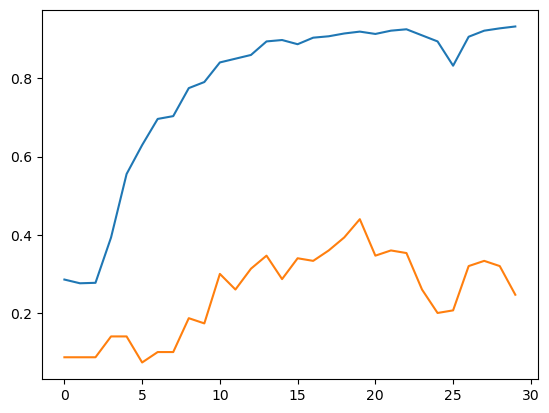

In [91]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='validation accuracy')


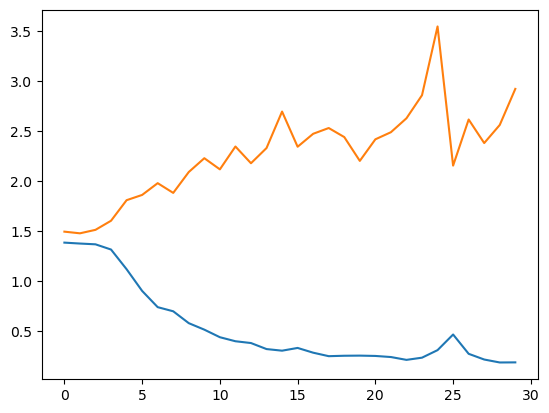

In [92]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='validation loss')